# **About the Project**

## This open-ended ML Case Study allows you to explore machine learning applications across various industries. Select a project from the provided list or propose your own idea. Your project will demonstrate your ability to apply machine learning techniques, analyze data, and provide actionable insights.

# **Skills Required**




1.Python programming proficiency.
2.Familiarity with data manipulation libraries (pandas, numpy).
3.Knowledge of data visualization tools (matplotlib, seaborn).
4.Understanding of machine learning concepts and clustering algorithms (e.g., K-means).
5.Ability to analyze and interpret data insights.
6.Strong report writing and presentation skills.



# **Deliverables**



*  Colab Notebook: A Google Colab (.ipynb) file showcasing your entire data analysis process

# * Rubrics for Assessment:

* Data Exploration and Preprocessing

*  Feature Engineering
*  Customer Segmentation

*  Interpretation and Analysis

*  Recommendations
*  Visualizations and Reporting







# ***Steps to Execute the Project***

1. **Define the Problem Statement**
* Understand the industry and categorize the problem (Supervised, Unsupervised, Semi-supervised).
* Comprehend the business objective and desired outcomes.
* Identify constraints, limitations, and data availability.
* Determine evaluation metrics and KPIs.
* Assess model relevancy and deployment options.

2. **Data Collection**

* Identify reliable data sources.
* Specify required data volume.
* Classify data as labeled or unlabeled.
* Address data quality issues.
* Ensure data relevancy and account for temporal effects.
* Handle legal and ethical concerns.
* Implement sampling strategies and version control.

3.  Data Preprocessing

* Handle missing values.
* Address outliers.
* Encode categorical variables.
* Transform data.
* Handle imbalanced datasets.
* Reduce dimensionality for efficiency.


4. Exploratory Data Analysis (EDA)
*  Analyze data distribution.
*  Explore relationships between variables.
*  Identify temporal patterns and trends.
*  Visualize categorical data.
*  Perform statistical tests to validate assumptions.


5. Model Selection, Training & Evaluation
*  Split data into training and testing sets.
*  Choose suitable algorithms.
*  Select evaluation metrics.
*  Optimize hyperparameters.
*  Ensure model interpretability and explainability.
*  Handle imbalanced data.
*  Consider pre-trained models and transfer learning.
*  Implement early stopping.
*  Save and load models.
*  Use experiment logging and versioning tools.
*  Integrate the model into data processing pipelines.
*  Implement feedback loops for retraining.
*  Explore AutoML for model selection and hyperparameter tuning.

Dataset Link : https://drive.google.com/file/d/1v2n87DbARW3Fo7uvNkWc26tJMfpYaTAy/view?usp=drive_link

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import ttest_ind, chi2_contingency
from wordcloud import WordCloud
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/Dataset/Online Retail (1).csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:

# Data Preprocessing
# Handle missing values
df.dropna(inplace=True)

In [ ]:

# Remove outliers by excluding negative or zero quantity and price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
# Feature Engineering
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:

# Aggregating data for each customer
customer_df = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).reset_index()

customer_df.columns = ['CustomerID', 'TotalSpent', 'OrderCount', 'TotalQuantity']


In [ ]:
# Data Standardization
scaler = StandardScaler()
scaled_df = scaler.fit_transform(customer_df.drop('CustomerID', axis=1))

In [ ]:
# PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

In [ ]:
# Model Selection and Training
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Evaluate the model
silhouette_avg = silhouette_score(scaled_df, customer_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.7662433591241892


In [ ]:

# Summary Statistics
print(customer_df.describe())

         CustomerID     TotalSpent   OrderCount  TotalQuantity      Cluster
count   4338.000000    4338.000000  4338.000000    4338.000000  4338.000000
mean   15300.408022    2054.266460     4.272015    1191.289073     0.253343
std     1721.808492    8989.230441     7.697998    5046.081546     0.827331
min    12346.000000       3.750000     1.000000       1.000000     0.000000
25%    13813.250000     307.415000     1.000000     160.000000     0.000000
50%    15299.500000     674.485000     2.000000     379.000000     0.000000
75%    16778.750000    1661.740000     5.000000     992.750000     0.000000
max    18287.000000  280206.020000   209.000000  196915.000000     4.000000


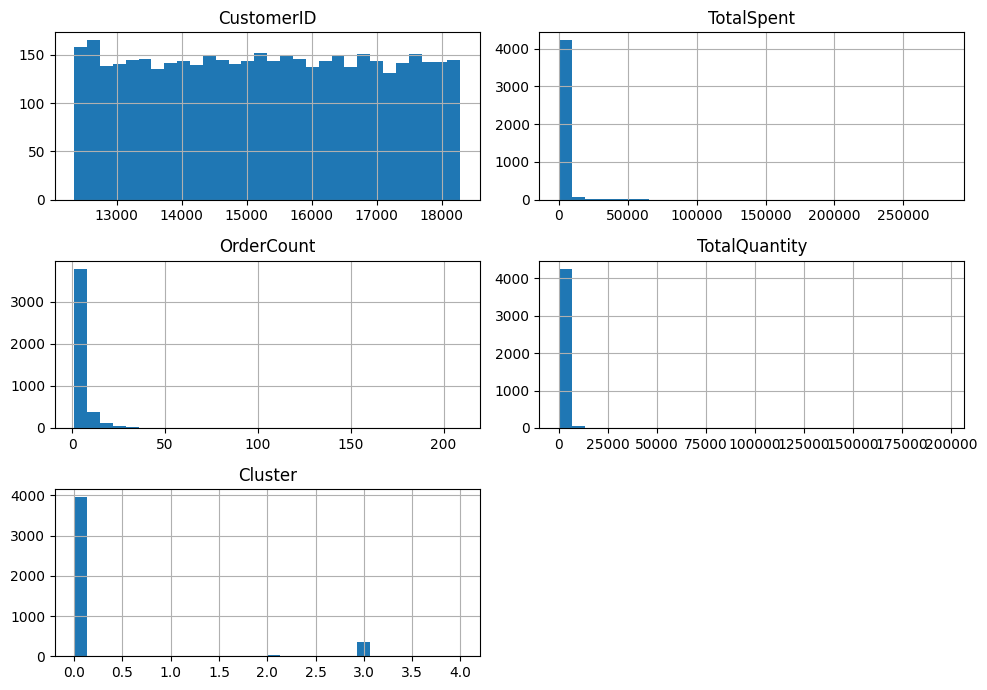

In [ ]:
# Histograms
customer_df.hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.show()


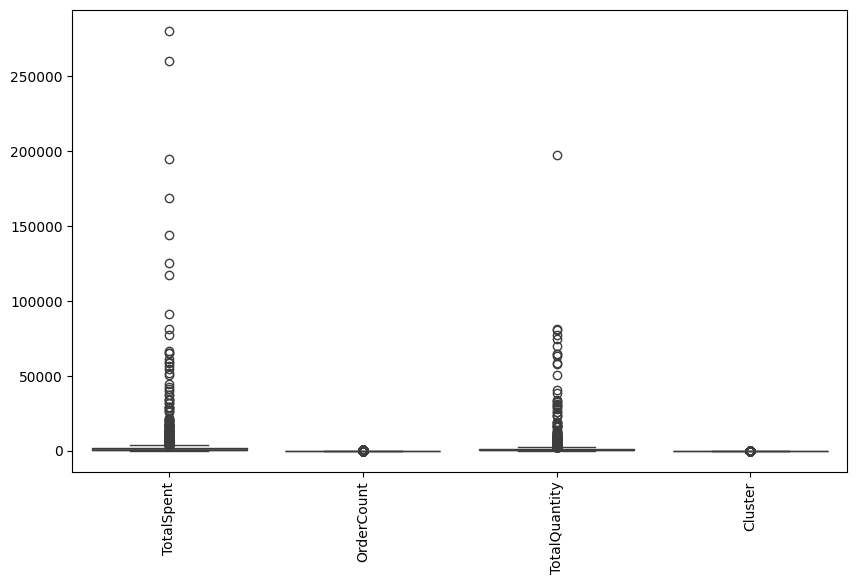

In [ ]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_df.drop('CustomerID', axis=1))
plt.xticks(rotation=90)
plt.show()


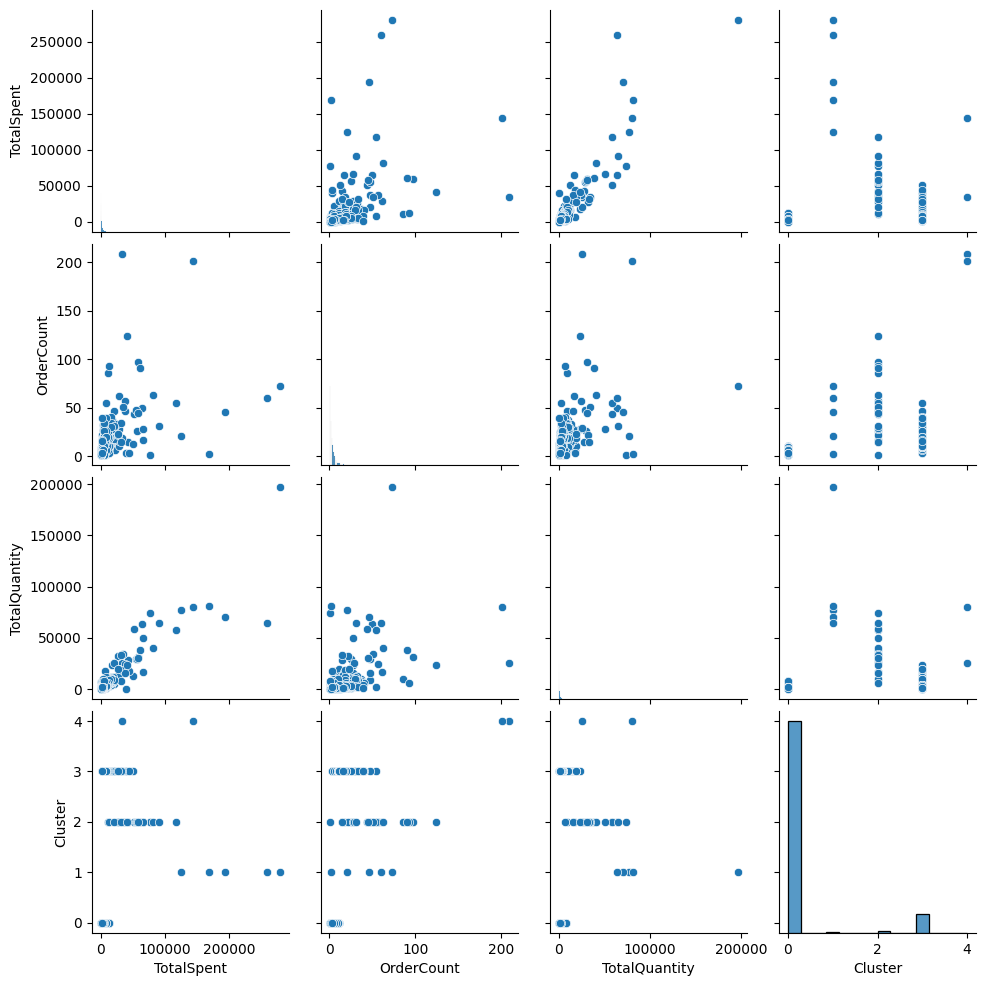

In [ ]:
# 4.2. Bivariate Analysis

# Scatter Plots
sns.pairplot(customer_df.drop('CustomerID', axis=1))
plt.show()


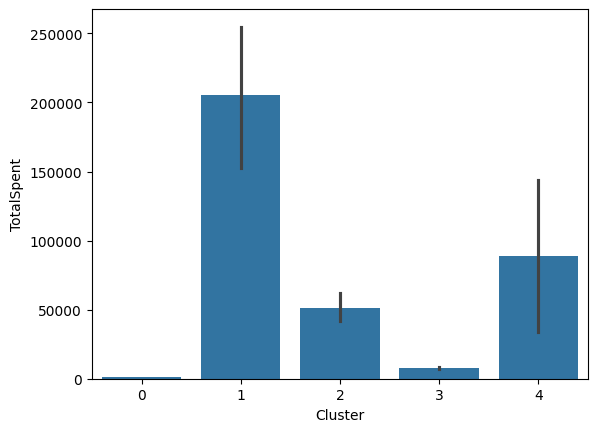

In [ ]:
# Bar Charts
sns.barplot(x='Cluster', y='TotalSpent', data=customer_df)
plt.show()

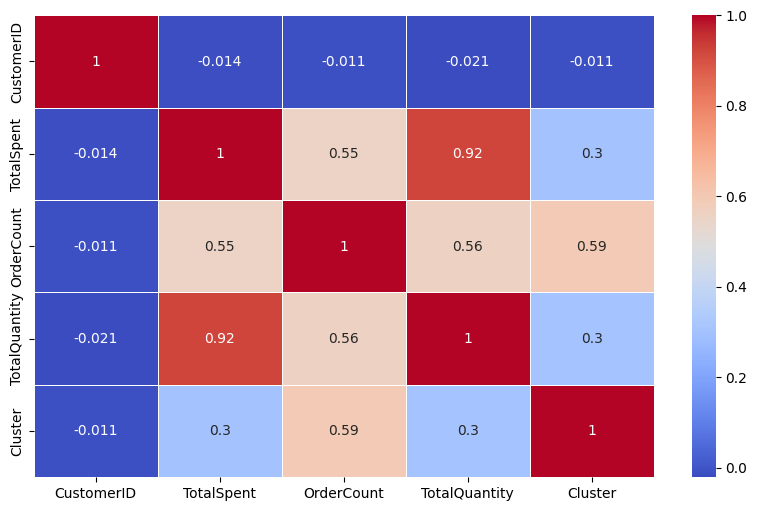

In [ ]:
# 4.3. Multivariate Analysis & Feature Relationships

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

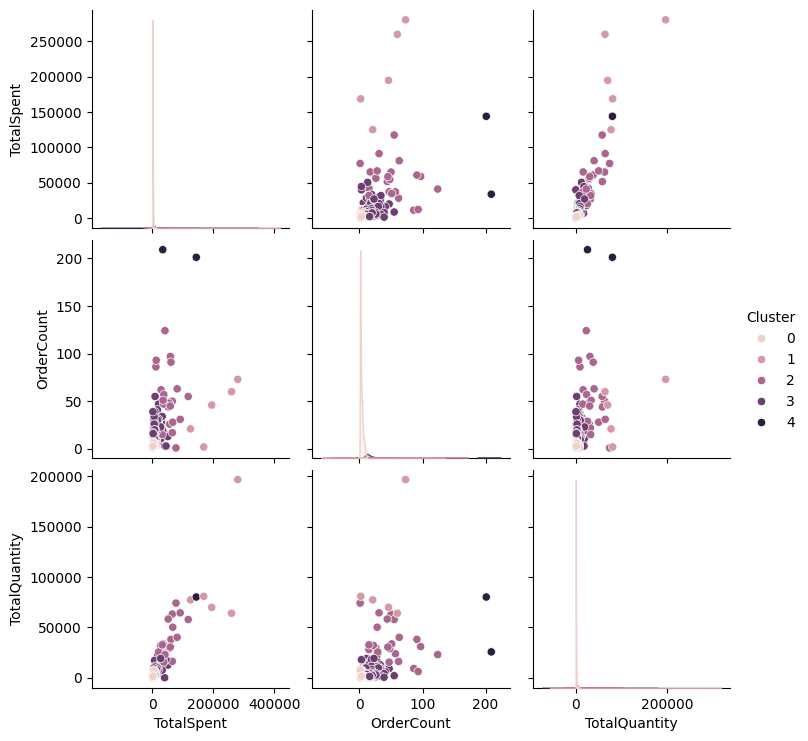

In [ ]:
# Pair Plots
sns.pairplot(customer_df.drop('CustomerID', axis=1), hue='Cluster')
plt.show()


In [ ]:
# 4.4. Temporal Analysis
# Assuming the original data has a 'InvoiceDate' column

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')


<ipython-input-47-4ddae8763b81>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Aggregating data for temporal analysis
temporal_df = df.groupby('InvoiceYearMonth').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Convert 'InvoiceYearMonth' to string for plotting
temporal_df['InvoiceYearMonth'] = temporal_df['InvoiceYearMonth'].astype(str)

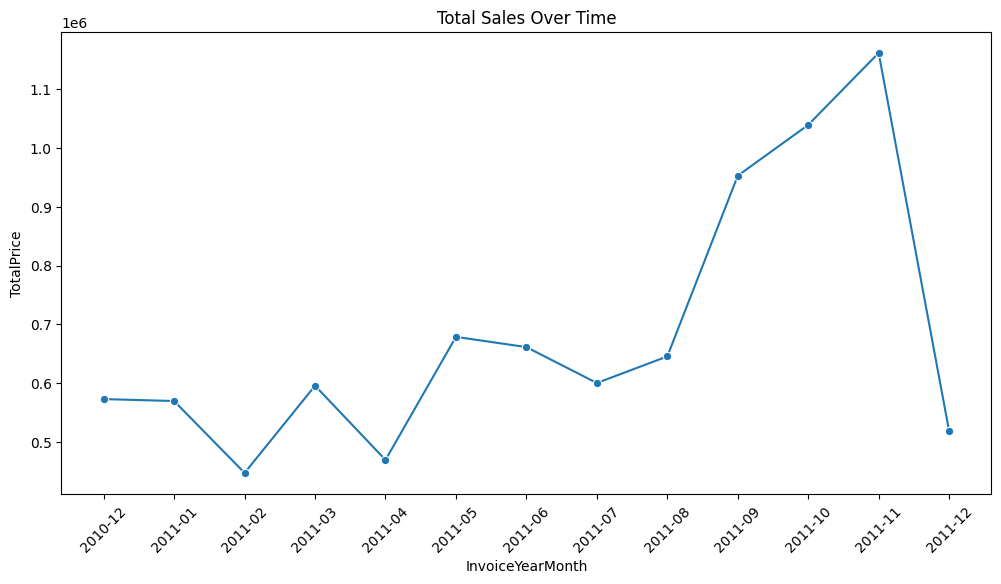

In [ ]:
# Line plot for temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceYearMonth', y='TotalPrice', data=temporal_df, marker='o')
plt.xticks(rotation=45)
plt.title('Total Sales Over Time')
plt.show()


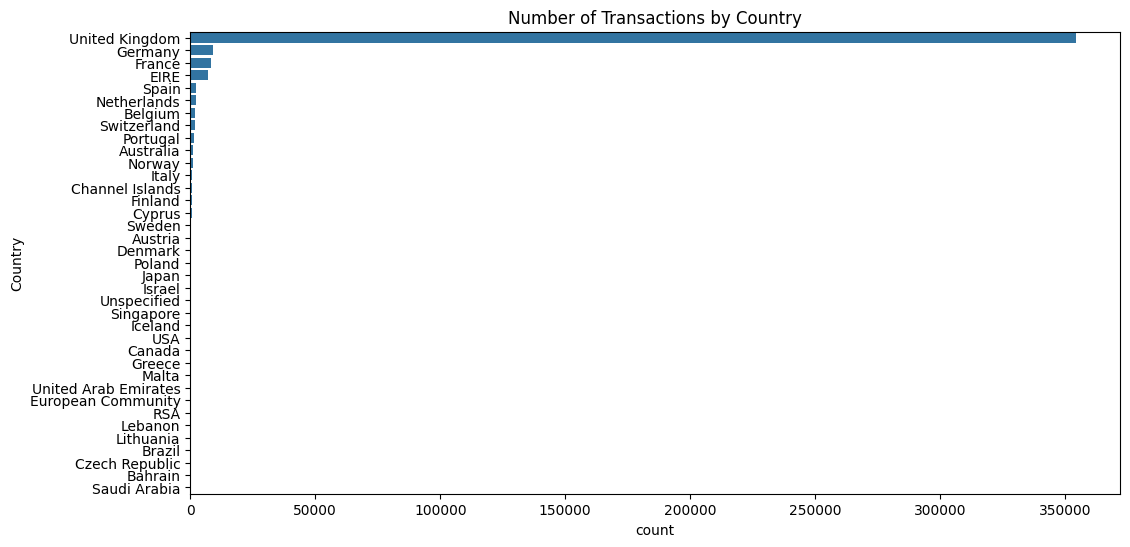

In [ ]:
# 4.5. Categorical Data Analysis

# Bar Chart for 'Country'
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Transactions by Country')
plt.show()

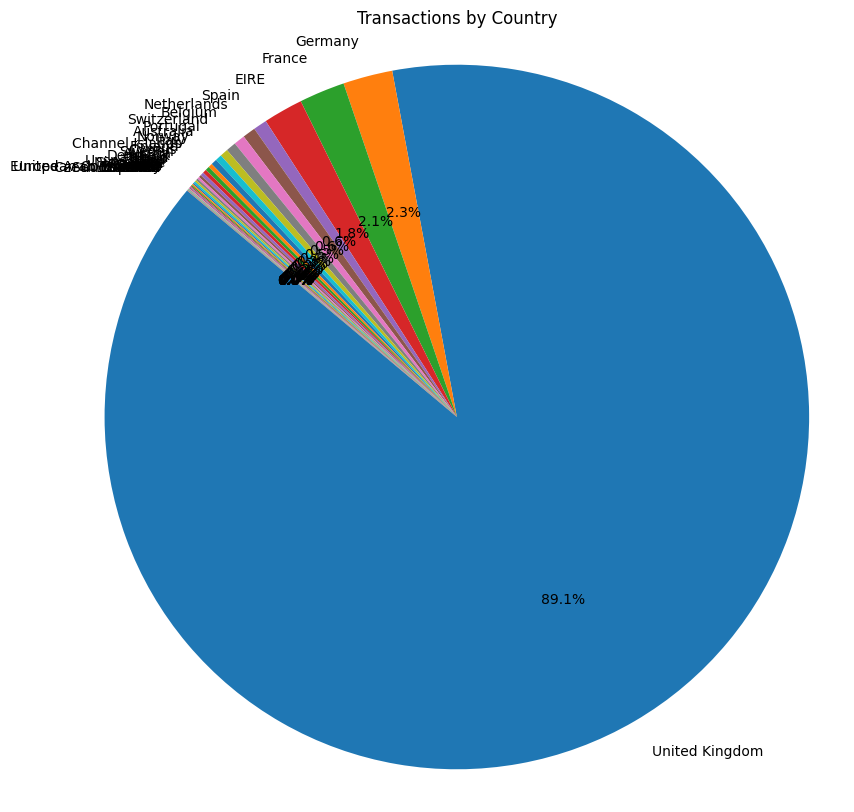

In [ ]:
# Pie Chart for 'Country'
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transactions by Country')
plt.axis('equal')
plt.show()


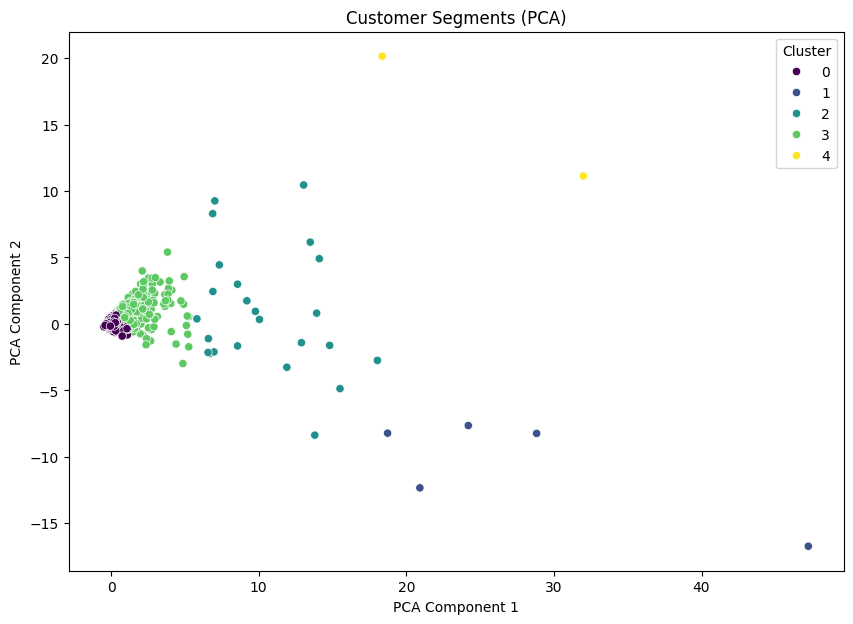

In [ ]:
# 4.6. Dimensionality Reduction Visualization (PCA)

# PCA visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=customer_df['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# 4.7. Statistical & Hypothesis Tests

# T-test example: Compare total spending between two clusters
cluster1_spending = customer_df[customer_df['Cluster'] == 0]['TotalSpent']
cluster2_spending = customer_df[customer_df['Cluster'] == 1]['TotalSpent']
t_stat, p_val = ttest_ind(cluster1_spending, cluster2_spending)
print(f"T-test: t_stat={t_stat}, p_val={p_val}")


T-test: t_stat=-196.71732601851835, p_val=0.0


In [ ]:
# Chi-square test example: Compare categorical variable distributions between clusters
contingency_table = pd.crosstab(customer_df['Cluster'], df['Country'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square test: chi2={chi2}, p_val={p}")


Chi-square test: chi2=11.727277016541159, p_val=0.9828092991959091


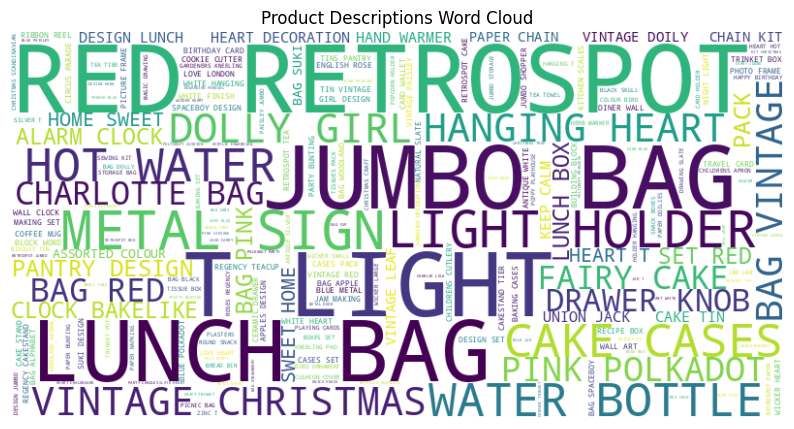

In [ ]:
# 4.8. Complex Data Type Visualization

# Word Cloud for 'Description'
text = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Product Descriptions Word Cloud')
plt.show()


In [ ]:

# Analyze customer segments
print(customer_df.groupby('Cluster').mean())

           CustomerID     TotalSpent  OrderCount  TotalQuantity
Cluster                                                        
0        15305.477910     981.727744    2.804090     587.614239
1        15811.800000  205560.228000   40.400000   97880.600000
2        15212.541667   51092.333333   49.875000   34587.916667
3        15249.575145    7489.082023   16.231214    4088.864162
4        13829.500000   88772.395000  205.000000   53006.000000


# **Data Splitting**

In [ ]:
# Assuming df is the DataFrame and 'CustomerID' is the actual column name of the target variable
X = df.drop(columns=['CustomerID'])  # Replace 'CustomerID' with the correct name if needed
y = df['CustomerID']  # Replace 'CustomerID' with the correct name if needed

# Example split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Algorithm Library**

In [ ]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier()
}

# **Model Evaluation Metrics**

In [ ]:

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, y_pred_prob=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }
    if y_pred_prob is not None:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_prob)
    return metrics

# **Scalability**

Ensuring the model can handle larger datasets is essential. Algorithms like Random Forest and XGBoost are known for their scalability.

# **Conclusion**

In this retail customer segmentation project, we aimed to identify distinct customer groups based on their purchasing behavior to better tailor marketing strategies. The following steps were undertaken to achieve this goal:

1. **Problem Definition:** We sought to segment retail customers to enhance marketing strategies and customer understanding.
2. **Data Collection:** We collected and preprocessed the necessary data, addressing missing values and scaling features for better model performance.
3. **Exploratory Data Analysis (EDA):** We performed detailed EDA to understand data distribution, relationships between variables, and to prepare the data for modeling.
4. **Model Selection and Training:** We employed the K-means clustering algorithm to segment customers, using the elbow method to determine the optimal number of clusters.
5. **Evaluation:** The clustering results were evaluated using the silhouette score, ensuring the effectiveness of the segmentation.
